In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
Lables_dir = './0__Labels_we_use/'
names = ['Subject','Group','Sex','Age','Format']
data = pd.read_csv(Lables_dir + "Downloaded_Images_Data.csv") 
d = data.drop_duplicates(subset = ['Subject'], keep = 'first' )

print('Number of patients:', d['Sex'].count())

Number of patients: 656


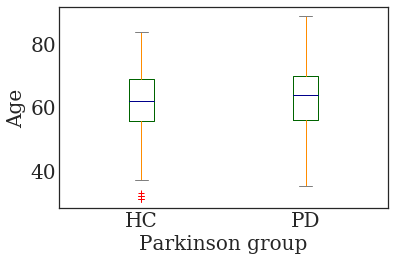

In [18]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',  medians='DarkBlue', caps='Gray')


d_Normal= d[d['Group'] == 'HC']['Age']
d_Normal = d_Normal.reset_index()
d_Normal.rename(columns={'Age': 'HC'}, inplace = True)

d_PD = d[d['Group'] == 'PD']['Age']
d_PD = d_PD.reset_index()
d_PD.rename(columns={'Age': 'PD'}, inplace = True)

colors = ['pink', 'lightblue', 'lightgreen']
DD = pd.concat([d_Normal['HC'], d_PD['PD']], axis=1)
ax = DD.plot.box( fontsize = 20, color = color, sym = 'r+')
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.xlabel('Parkinson group', fontsize = 20)
plt.ylabel('Age', fontsize = 20)
plt.gcf().subplots_adjust(bottom = 0.18)
plt.gcf().subplots_adjust(left = 0.14)

fig = ax.get_figure()
fig.savefig('./PPM_group_VS_Age.pdf')
plt.show()

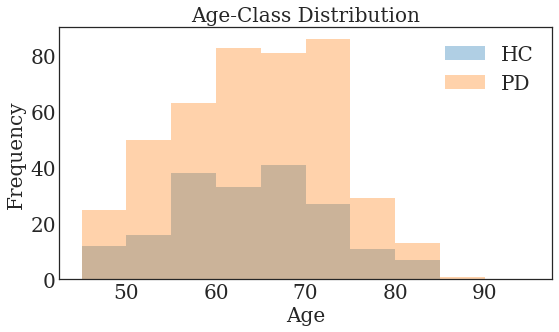

In [19]:
bin_values = np.arange(start = 45, stop = 100, step = 5)
group_Patients = d.groupby('Group')['Age']
ax = group_Patients.plot.hist(bins = bin_values, 
                              figsize = [9,5], alpha = 0.35, legend = True, stacked = True, 
                              fontsize = 20) 

plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.title("Age-Class Distribution", fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.gcf().subplots_adjust(bottom = 0.18)
plt.gcf().subplots_adjust(left = 0.14)

plt.savefig('./Age_Class_Distribution.pdf')
plt.show()

In [20]:
bySex       = d.groupby('Sex')
byGroup     = d.groupby('Group')
byAge       = d.groupby('Age')
bySex_Group = d.groupby(['Sex', 'Group'])

In [21]:
bySex.describe()

Age                                                     Subject  \
     count       mean        std   min   25%   50%   75%   max   count   
Sex                                                                      
F    230.0  61.126087  10.458766  31.0  55.0  61.0  69.0  84.0   230.0   
M    426.0  62.814554  10.252615  31.0  57.0  64.0  70.0  89.0   426.0   

                                                                       
            mean         std     min     25%     50%      75%     max  
Sex                                                                    
F    3529.808696  345.518619  3000.0  3208.5  3504.5  3818.75  4123.0  
M    3561.312207  328.368478  3001.0  3302.0  3525.5  3824.50  4140.0

In [22]:
byGroup.describe()

Age                                                      Subject  \
       count       mean        std   min    25%   50%   75%   max   count   
Group                                                                       
HC     204.0  60.857843  11.225604  31.0  55.75  62.0  69.0  84.0   204.0   
PD     452.0  62.838496   9.879227  35.0  56.00  64.0  70.0  89.0   452.0   

                                                                          
              mean         std     min      25%     50%      75%     max  
Group                                                                     
HC     3519.299020  320.594097  3000.0  3221.75  3492.0  3803.25  4140.0  
PD     3564.243363  340.094448  3001.0  3277.25  3535.5  3833.25  4137.0

In [23]:
bySex_Group['Age'].describe()

count       mean        std   min   25%   50%    75%   max
Sex Group                                                            
F   HC      70.0  59.185714  11.563677  31.0  53.0  60.0  68.00  84.0
    PD     160.0  61.975000   9.855529  35.0  56.0  62.0  69.00  84.0
M   HC     134.0  61.731343  10.987460  31.0  57.0  63.0  69.75  83.0
    PD     292.0  63.311644   9.877017  36.0  57.0  64.5  71.00  89.0